In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [85]:
# df = pd.read_excel("quantification.xlsx")
# df_key = pd.read_excel("key.xlsx",names=["key","Image","Condition", "Heatshock"])

In [86]:
# df = pd.merge(df,df_key,on="Image")
# del df["Image"]
# df.head()
# df.to_excel("Average_foci_quantification_raw_data.xlsx", index=None)

/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


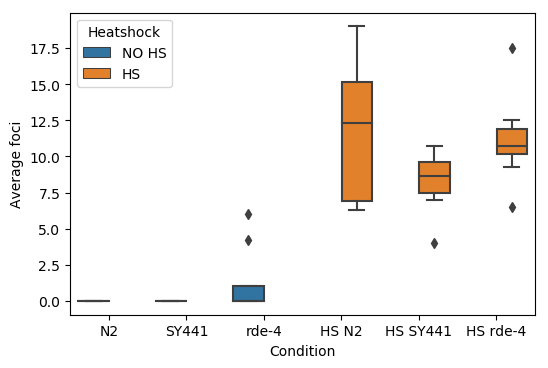

In [122]:

df = pd.read_excel("Average_foci_quantification_raw_data.xlsx")
list(df)
order = ["N2",'SY441', 'rde-4', 'HS N2', 'HS SY441','HS rde-4']
plt = sns.boxplot(x="Condition",y="Average foci", data=df, hue="Heatshock",order=order)


# plt.legend_.remove()
fig = plt.get_figure()
fig.savefig("Average_foci.tif",dpi=600,format="tiff")


In [109]:
# ANOVA
grps = pd.unique(df["Condition"].values)
d_data = {grp:df["Average foci"][df["Condition"] == grp] for grp in grps}

In [110]:
k = len(pd.unique(df["Condition"]))  # number of conditions
N = len(df.values)  # conditions times participants
n = df.groupby("Condition").size()[0] #Participants in each condition

In [111]:
df["AverageFoci"] = df["Average foci"] # Rename because the test wont take spaces for names
mod = ols("AverageFoci ~ Condition", data=df).fit()

In [112]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [113]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
res2 = pairwise_tukeyhsd(df["AverageFoci"], df["Condition"])
# res2 = pairwise_tukeyhsd(dta2['StressReduction'], dta2['Treatment'])
print(res2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper  reject
--------------------------------------------------
 HS N2   HS SY441 -3.4391  -7.7665   0.8883 False 
 HS N2   HS rde-4  -0.508   -4.698   3.682  False 
 HS N2      N2    -11.6842 -15.8742 -7.4942  True 
 HS N2    SY441   -11.6842 -15.8742 -7.4942  True 
 HS N2    rde-4   -10.403  -14.593   -6.213  True 
HS SY441 HS rde-4  2.9311  -1.2589   7.1211 False 
HS SY441    N2    -8.2451  -12.4351 -4.0552  True 
HS SY441  SY441   -8.2451  -12.4351 -4.0552  True 
HS SY441  rde-4   -6.9639  -11.1539 -2.7739  True 
HS rde-4    N2    -11.1762 -15.2242 -7.1283  True 
HS rde-4  SY441   -11.1762 -15.2242 -7.1283  True 
HS rde-4  rde-4    -9.895  -13.9429 -5.8471  True 
   N2     SY441     0.0    -4.0479   4.0479 False 
   N2     rde-4    1.2812  -2.7667   5.3292 False 
 SY441    rde-4    1.2812  -2.7667   5.3292 False 
--------------------------------------------------
